In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Cycling data

In [2]:
df_cycling = pd.read_sql_table('cycling', 'sqlite:///data/my_data.sqlite', index_col=["Datetime"], parse_dates=["Datetime"])

In [3]:
df_cycling.head()

,index,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,,
2020-04-01 00:00:00,0,4,0,4,0,0,0
2020-04-01 00:15:00,1,3,1,2,0,0,0
2020-04-01 00:30:00,2,2,2,0,0,0,0
2020-04-01 00:45:00,3,7,2,5,0,0,0
2020-04-01 01:00:00,4,2,2,0,0,0,0


In [4]:
df_cycling.index

DatetimeIndex(['2020-04-01 00:00:00', '2020-04-01 00:15:00',
               '2020-04-01 00:30:00', '2020-04-01 00:45:00',
               '2020-04-01 01:00:00', '2020-04-01 01:15:00',
               '2020-04-01 01:30:00', '2020-04-01 01:45:00',
               '2020-04-01 02:00:00', '2020-04-01 02:15:00',
               ...
               '2020-04-30 21:30:00', '2020-04-30 21:45:00',
               '2020-04-30 22:00:00', '2020-04-30 22:15:00',
               '2020-04-30 22:30:00', '2020-04-30 22:45:00',
               '2020-04-30 23:00:00', '2020-04-30 23:15:00',
               '2020-04-30 23:30:00', '2020-04-30 23:45:00'],
              dtype='datetime64[ns]', name='Datetime', length=2880, freq=None)

In [ ]:
df_cycling.index.max() - df_cycling.index.min()

In [ ]:
df_cycling.groupby(df_cycling["Datetime"].dt.day)["100035541 (Neutor)"].sum()

In [5]:
april_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]

In [6]:
t = april_bikes.index

In [ ]:
df_cycling.groupby(df_cycling["Datetime"].dt.hour)["100035541 (Neutor)"].sum().plot(kind='bar', rot=0, ax=axs)

## Rain data

In [8]:
df_rain = pd.read_sql_table('rain', 'sqlite:///data/my_data.sqlite', index_col=["MESS_DATUM"], parse_dates=["MESS_DATUM"])

In [14]:
df_rain["RWS_10"].min()

-999.0

In [15]:
df_rain["2020-04-01":"2020-04-30"]["RWS_10"].min()

0.0

In [ ]:
df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]

In [9]:
april_rain_duration = df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]["RWS_DAU_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_16504\1751322442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  april_rain = df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]["RWS_DAU_10"]


In [12]:
april_rain_amount = df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]["RWS_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_16504\2676560937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  april_rain_amount = df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]["RWS_10"]


## Plotting

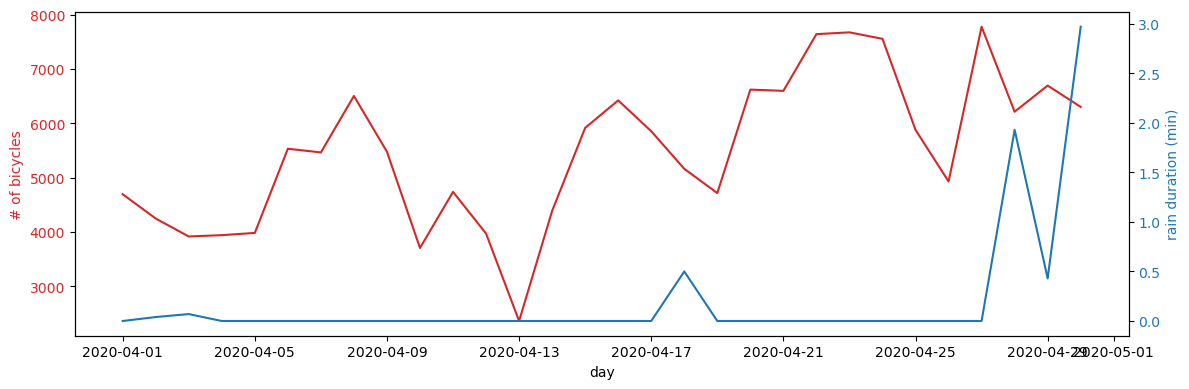

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, april_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, april_rain_amount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Cleaning

In [ ]:
df_rain["RWS_10"].min()

In [ ]:
idx_erroneous_rows = df_rain[df_rain["RWS_10"] < 0].index

In [ ]:
cleaned = df_rain.drop(idx_erroneous_rows, axis=0)

In [ ]:
cleaned.groupby(cleaned["MESS_DATUM"].dt.year)["RWS_10"].sum()

In [ ]:
cleaned.groupby(cleaned["MESS_DATUM"].dt.hour)["RWS_10"].sum().plot(kind='bar', rot=0, ax=axs)

In [ ]:
cleaned.head()